In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
dataset = pd.read_csv("Gold_price_dataset.csv")
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
dataset.shape

(2290, 6)

In [4]:
dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
dataset['Date'] = pd.to_datetime(dataset['Date'])


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [8]:
dataset.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2013-03-17 08:23:41.135371008,1654.315776,122.732875,31.842221,20.084997,1.283653
min,2008-01-02 00:00:00,676.530029,70.000000,7.960000,8.850000,1.039047
25%,2010-08-20 00:00:00,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,2013-03-13 12:00:00,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2015-10-25 00:00:00,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2018-05-16 00:00:00,2872.870117,184.589996,117.480003,47.259998,1.598798
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547


In [9]:
correlation = dataset.corr()

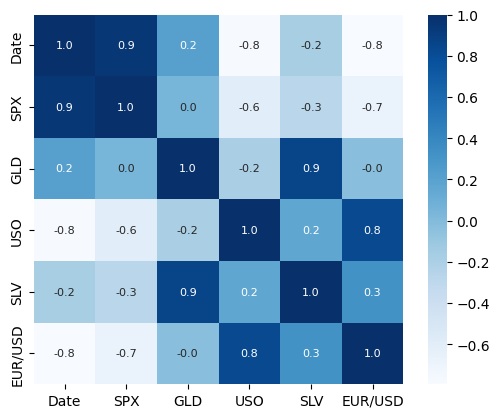

In [10]:
sns.heatmap(correlation, cbar=True, square=True, annot=True, fmt=".1f", annot_kws={"size":8}, cmap="Blues")
plt.show()

In [11]:
print(correlation["GLD"])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


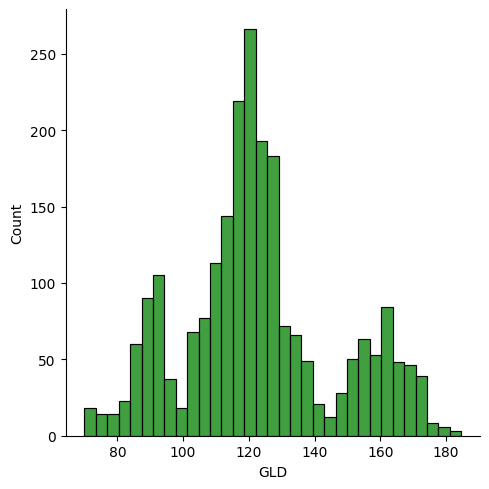

In [12]:
sns.displot(dataset["GLD"], color="g")
plt.show()

Splitting the features and target

In [13]:
x = dataset.drop(["Date","GLD"], axis=1)
y = dataset["GLD"]

In [14]:
x,y

(              SPX        USO      SLV   EUR/USD
 0     1447.160034  78.470001  15.1800  1.471692
 1     1447.160034  78.370003  15.2850  1.474491
 2     1411.630005  77.309998  15.1670  1.475492
 3     1416.180054  75.500000  15.0530  1.468299
 4     1390.189941  76.059998  15.5900  1.557099
 ...           ...        ...      ...       ...
 2285  2671.919922  14.060000  15.5100  1.186789
 2286  2697.790039  14.370000  15.5300  1.184722
 2287  2723.070068  14.410000  15.7400  1.191753
 2288  2730.129883  14.380000  15.5600  1.193118
 2289  2725.780029  14.405800  15.4542  1.182033
 
 [2290 rows x 4 columns],
 0        84.860001
 1        85.570000
 2        85.129997
 3        84.769997
 4        86.779999
            ...    
 2285    124.589996
 2286    124.330002
 2287    125.180000
 2288    124.489998
 2289    122.543800
 Name: GLD, Length: 2290, dtype: float64)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

Model Training

In [31]:
rfr = RandomForestRegressor(n_estimators=100)


In [32]:
rfr.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
rfr.score(x_train, y_train)*100, rfr.score(x_test, y_test)*100

(99.85866047567411, 99.03173044403033)

model evaluation

In [34]:
test_data_prediction = rfr.predict(x_test)
print(test_data_prediction)

[122.47170003 130.88720213 127.57949953  96.62899756 119.16380039
 114.72969984 124.75960127 117.6596993  107.99650157  98.01819977
  95.24779984 167.32599905 148.57090117 116.30950058 170.47260106
  85.14929976 122.95769875 109.07769706 112.99440081 131.72300298
 124.27229897 113.72720084 116.16480057 108.74919977 108.2911013
 125.86479915 119.83129985 112.10769928 113.60060186 125.46389887
 145.75650104  89.42620006 168.14189947 113.87719923 108.32830113
 120.35460069 141.69869919 161.21240146 173.54369807 152.98760153
 119.59950127 113.5544006  121.32699986 113.60329942 122.05530013
 107.88790066  88.76299885 114.48489918 129.53320197 117.67780057
 104.1187     129.63240225 107.11999802 160.4623032  131.57760095
 118.4023997  146.63180063 135.02590224  95.34550074 124.54220174
 115.18059852  86.17030091 104.23679901 113.82910066  84.0135991
 122.34720025 116.56809911 113.49890212 165.86560332  92.32060025
  80.45140099 161.15380084 159.14700222 106.38900009 148.49320161
 109.6252975

In [35]:
# R squared error
r2_score = metrics.r2_score(y_test, test_data_prediction)
print("R squard error :", r2_score*100)

R squard error : 99.03173044403033


Building a predictive system

In [36]:
input_data =(1447.160034 ,78.470001 ,15.1800 ,1.471692)  #  Output:-  84.860001
input_data_as_array = np.asarray(input_data)
input_data_as_array_reshape = input_data_as_array.reshape(1,-1)
result = rfr.predict(input_data_as_array_reshape)
print("Present Goad Price :",result[0])

Present Goad Price : 85.05760033999995


c:\Users\RAJAN KUMAR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
